In [1]:
import numpy as np  
import matplotlib.pyplot as plt

In [11]:
a=2*np.random.rand(100,1)

In [12]:
b=4+3*a+np.random.rand(100,1)

In [13]:
b.shape

(100, 1)

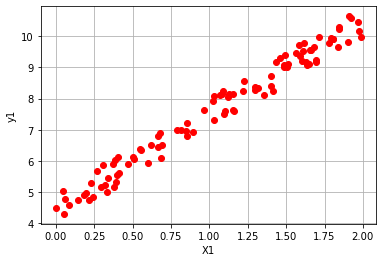

In [32]:
plt.plot(a,b,'ro')

plt.xlabel('X1')
plt.ylabel('y1')
plt.grid()
plt.show()

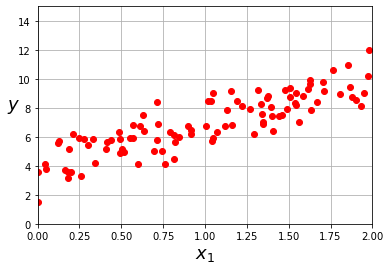

In [25]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "ro")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [29]:
X_b = np.c_[np.ones((100, 1)), X]  
best_parameters  = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(best_parameters)

[[3.94034617]
 [2.99506973]]


### Prediction on new data

In [6]:
X_new = np.array([[0.75], [1.9]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(best_parameters)
y_predict

array([[6.31989224],
       [9.85994861]])

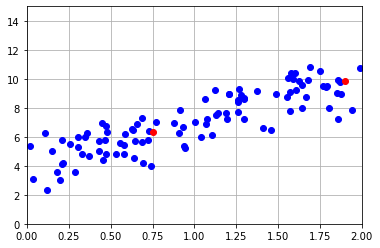

In [7]:
plt.plot(X, y, "bo")
plt.plot(X_new, y_predict, "ro")
plt.grid()
plt.axis([0, 2, 0, 15])
plt.show()

### Linear Regression

In [8]:
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('W0 = ', float(lin_reg.intercept_), 'W1= ',  float(lin_reg.coef_))

W0 =  4.011159829190181 W1=  3.0783098829862836


In [10]:
X_new = np.array([[0.75], [1.9]])
lin_reg.predict(X_new)

array([[6.31989224],
       [9.85994861]])

### Batch Gradient Descent

In [11]:
learning_rate = 0.1
max_iterations = 1000
samples = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(max_iterations):
    gradients = 2/samples * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

In [12]:
print(theta)

[[4.01115983]
 [3.07830988]]


In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
X_new = np.array([[0], [2]])
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.4)

plt.show()

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown                                # not shown
plt.show()                                           # not shown

In [ ]:
theta

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

In [ ]:
X_new = np.array([[0.75], [1.9]])
pred = sgd_reg.predict(X_new)


In [ ]:
plt.plot(X, y, "bo")
plt.plot(X_new, pred, "ro")
plt.grid()
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
#Mini-batch gradient descent
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()